In [1]:
#importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('ALL PRICES - NHC PROJECTS.xlsx',sheet_name=1)

In [3]:
df.head()

,PROJECT_NAME,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_1,PRICE_2,LATITUDE,LONGITUDE
0,KONGWA,2,56.0,normal,35492580.0,41881244.4,-6.2000,36.4170
1,KONGWA,3,70.0,normal,39835800.0,47006244.0,-6.2000,36.4170
2,KONGWA,3,56.0,normal,40166280.0,47396210.4,-6.2000,36.4170
3,MKUZO,2,56.0,normal,36310680.0,42846602.4,-10.6425,35.6317
4,MKUZO,3,70.0,normal,41727960.0,49238992.8,-10.6425,35.6317


In [4]:
#reshuffling the data
df_shuf=df.sample(frac=1).reset_index(drop=True)

In [5]:
df_shuf.head()

,PROJECT_NAME,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_1,PRICE_2,LATITUDE,LONGITUDE
0,Buswelu - Mwanza,3,85.0,normal,63750000.0,75225000.0,-2.5154,32.9736
1,KONGWA,3,56.0,normal,40166280.0,47396210.4,-6.2000,36.4170
2,Longido - Arusha,3,85.0,normal,51574000.0,60857320.0,-2.7322,36.6955
3,Buhare - Musoma,3,85.0,normal,49850000.0,58823000.0,-1.5000,33.8000
4,KONGWA,3,70.0,normal,39835800.0,47006244.0,-6.2000,36.4170


<AxesSubplot:>

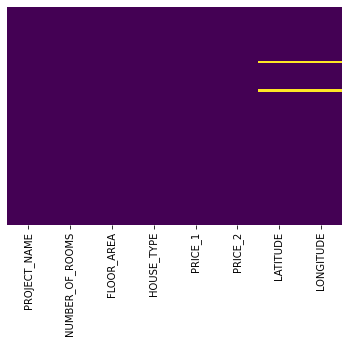

In [6]:
#visualizing the missing values present in the dataframe
sns.heatmap(df_shuf.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
#conversion of categorical data to numerical values via direct mapping

scale_mapper= {'normal':1, 'Apartment':2}
df_shuf['HOUSE_TYPE'].replace(scale_mapper, inplace=True)

In [8]:
df_shuf['HOUSE_TYPE'].value_counts()

1    60
2    25
Name: HOUSE_TYPE, dtype: int64

In [9]:
df_shuf.head()

,PROJECT_NAME,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_1,PRICE_2,LATITUDE,LONGITUDE
0,Buswelu - Mwanza,3,85.0,1,63750000.0,75225000.0,-2.5154,32.9736
1,KONGWA,3,56.0,1,40166280.0,47396210.4,-6.2000,36.4170
2,Longido - Arusha,3,85.0,1,51574000.0,60857320.0,-2.7322,36.6955
3,Buhare - Musoma,3,85.0,1,49850000.0,58823000.0,-1.5000,33.8000
4,KONGWA,3,70.0,1,39835800.0,47006244.0,-6.2000,36.4170


In [10]:
#dropping string columns and additional price column
new_df = df_shuf.drop(columns=['PROJECT_NAME','PRICE_1'], axis=1)

In [11]:
new_df.head(2)

,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_2,LATITUDE,LONGITUDE
0,3,85.0,1,75225000.0,-2.5154,32.9736
1,3,56.0,1,47396210.4,-6.2000,36.4170


In [12]:
#filling the missing numerical values using the NN imputation method
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=20)

In [13]:
imput_df = imputer.fit_transform(new_df.values)
house_df = pd.DataFrame(imput_df, columns=new_df.columns)

<AxesSubplot:>

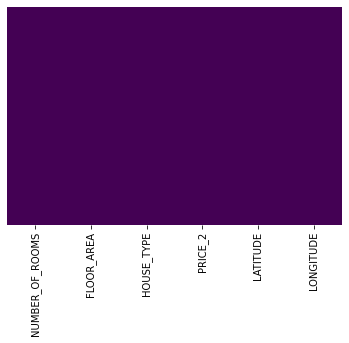

In [14]:
#visualizing the missing values present in the dataframe
sns.heatmap(house_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [15]:
#Standardizing the features using standard scaler for machine learning algorithms to understand
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
standardized_df = scaler.fit_transform(house_df)

In [16]:
#creating dataframe conducive for the ML algorithms
best_df = pd.DataFrame(standardized_df, columns=new_df.columns)

In [17]:
best_df.head()

,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_2,LATITUDE,LONGITUDE
0,0.245722,-0.487510,-0.645497,-0.501119,1.947024,-1.373821
1,0.245722,-1.100901,-0.645497,-0.637384,0.228121,-0.146139
2,0.245722,-0.487510,-0.645497,-0.571471,1.845885,-0.046845
3,0.245722,-0.487510,-0.645497,-0.581432,2.420719,-1.079183
4,0.245722,-0.804781,-0.645497,-0.639294,0.228121,-0.146139


In [18]:
#checking correlation of each feature in relation to the price
corr_matrix = best_df.corr()
corr_matrix['PRICE_2'].sort_values(ascending=False)

PRICE_2            1.000000
FLOOR_AREA         0.864313
HOUSE_TYPE         0.746561
NUMBER_OF_ROOMS    0.533343
LONGITUDE          0.452649
LATITUDE          -0.011895
Name: PRICE_2, dtype: float64

<AxesSubplot:xlabel='FLOOR_AREA', ylabel='PRICE_2'>

<Figure size 1080x576 with 0 Axes>

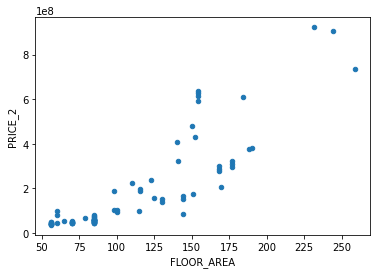

In [19]:
#plotting the most correlated feature against the price
plt.figure(figsize=(15,8))
house_df.plot(kind='scatter', x='FLOOR_AREA', y='PRICE_2', alpha=1)

/home/kb/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 864x576 with 0 Axes>

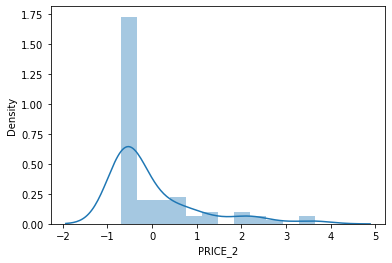

<Figure size 864x576 with 0 Axes>

In [20]:
#plotting the price distribution
sns.distplot(best_df.PRICE_2)
plt.figure(figsize=(12,8))

<AxesSubplot:>

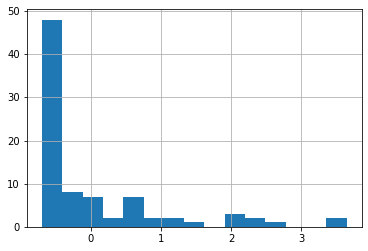

In [21]:
best_df['PRICE_2'].hist(bins=15)

<AxesSubplot:>

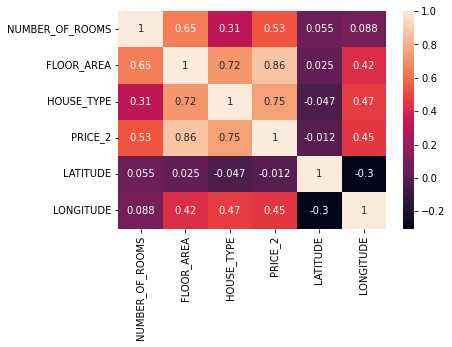

In [22]:
#heat map showing the correlation of features with respect to the price
sns.heatmap(best_df.corr(), annot=True)

In [23]:
#Assigning the features into X and Y 
X = best_df[['NUMBER_OF_ROOMS', 'FLOOR_AREA', 'HOUSE_TYPE', 'LATITUDE','LONGITUDE']]
y = best_df['PRICE_2']

In [24]:
#Splitting the features into training and test sets using scikit-learn library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [25]:
#importing evaluation metrics of linear regression models
from sklearn import metrics

In [26]:
#Training using the linear regression Model
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()

In [27]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [28]:
lr_pred = linear_regression.predict(X_test)

In [29]:
print(np.sqrt(metrics.mean_squared_error(y_test, lr_pred))) #RMSE
print('\n')
print(metrics.r2_score(y_test,lr_pred)) #R2

0.4038660754661493


0.8750243851457974


In [30]:
#checking other model performance
from sklearn.linear_model import Lasso, ElasticNet, LogisticRegression, Ridge

In [31]:
#Lasso regression
lasso_regres = Lasso()
lasso_regres.fit(X_train,y_train)

Lasso()

In [32]:
lasso_pred = lasso_regres.predict(X_test)

In [33]:
print(np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))
print('\n')
print(metrics.r2_score(y_test,lasso_pred))

1.1483403832439316


-0.010396444240059477


In [34]:
#ElasticNetRegression
elastic = ElasticNet()
elastic.fit(X_train,y_train)
elastic_pred = elastic.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, elastic_pred)))
print('\n')
print(metrics.r2_score(y_test,elastic_pred))

0.9790257314556842


0.2655897214733657


In [35]:
# Ridge regression
ridge = Ridge()
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print('\n')
print(metrics.r2_score(y_test,ridge_pred))

0.4090439030342166


0.871799304554118


In [36]:
#Training using the decision trees 
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)
dt_pred = dtree.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, dt_pred)))
print('\n')
print(metrics.r2_score(y_test,dt_pred))

0.7239802014042913


0.598390559384854


In [37]:
#for random forests
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=30, random_state=20)
regressor.fit(X_train, y_train)
rfr_pred = regressor.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print('\n')
print(metrics.r2_score(y_test,rfr_pred))

0.4887218862748412


0.8169902994781852


/home/kb/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE_2', ylabel='Density'>

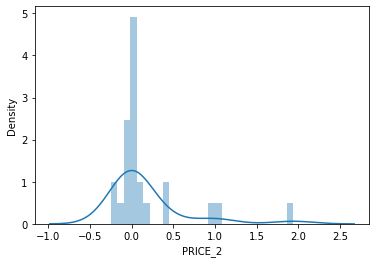

In [38]:
sns.distplot((y_test-rfr_pred))

In [39]:
#checking using the support vector regressor
from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train,y_train)
svr_pred = svr_regressor.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))
print('\n')
print(metrics.r2_score(y_test,svr_pred))

0.7997940289319168


0.5098750075513897


In [40]:
#Inversing the standardized features
inv_df=scaler.inverse_transform(standardized_df, copy=None)
nhc = pd.DataFrame(inv_df,columns=new_df.columns)

In [41]:
nhc.head()

,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_2,LATITUDE,LONGITUDE
0,3.0,85.0,1.0,75225000.0,-2.5154,32.9736
1,3.0,56.0,1.0,47396210.4,-6.2000,36.4170
2,3.0,85.0,1.0,60857320.0,-2.7322,36.6955
3,3.0,85.0,1.0,58823000.0,-1.5000,33.8000
4,3.0,70.0,1.0,47006244.0,-6.2000,36.4170


In [42]:
#Assigning the features into X and Y 
X_column= nhc[['NUMBER_OF_ROOMS', 'FLOOR_AREA', 'HOUSE_TYPE', 'LATITUDE','LONGITUDE']]
y_column = nhc['PRICE_2']

In [43]:
#Splitting the features into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_column, y_column, test_size=0.3, random_state=20)

In [44]:
#for random forests
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=30, random_state=20)
regressor.fit(X_train, y_train)
rfr_pred = regressor.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print('\n')
print(metrics.r2_score(y_test,rfr_pred))

100810043.66559936


0.8133024524093596


In [45]:
y_test[:3]

66    3.113276e+08
51    3.612924e+07
12    4.711138e+07
Name: PRICE_2, dtype: float64

In [46]:
rfr_pred[:3]

array([3.08028676e+08, 4.31629549e+07, 5.80859984e+07])

In [47]:
#Saving every other model
from json5 import dump, load

In [51]:
import pickle
with open('regressor_pkl', 'wb') as f:
    pickle.dump(regressor, f)

In [ ]:
# pred = loaded_regressor.predict(X_test)

In [ ]:
# pred[:5]

array([4.40038213e+07, 4.40038213e+07, 4.62742193e+07, 2.41352745e+08,
       5.07474867e+07])

In [ ]:
X_test

,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,LATITUDE,LONGITUDE
66,2.0,60.0,1.0,-6.864000,39.388000
51,2.0,60.0,1.0,-6.792500,39.208700
12,3.0,70.0,1.0,-6.380387,34.453901
83,3.0,144.0,1.0,-6.797800,39.262100
36,3.0,85.0,1.0,-6.864000,39.388000
44,4.0,244.0,2.0,-6.723100,39.229900
23,3.0,85.0,1.0,-6.302900,37.444600
0,2.0,56.0,1.0,-6.302900,37.444600
77,3.0,85.0,1.0,-10.658900,35.646000
45,3.0,79.0,2.0,-6.200800,35.836900
